## Month 01 (Mini-project) Data Analysis
Bytewise Fellowship (Data Science)

Submitted by: Awais Anwer

In [1]:
# Specifically, identify what contributes to higher enrollment and
# determine if the course type (online or classroom) is a significant factor.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Load Data

In [3]:
df = pd.read_csv('/content/university_enrollment_(Mini-project-01).csv')

## Data Cleaning

In [4]:
df.shape

(1850, 8)

In [5]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [6]:
df.tail()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math
1849,1850,online,2017,256,17.57,72.0,NaN,Math


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1665 non-null   float64
 6   pre_requirement   959 non-null    object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [9]:
df.course_type.value_counts()

course_type
online       1375
classroom     475
Name: count, dtype: int64

In [11]:
# check if there are some missing values
df.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score          185
pre_requirement     891
department            0
dtype: int64

In [12]:
df['post_score'].describe()

count    1665.000000
mean       75.204805
std         8.511981
min        51.000000
25%        69.000000
50%        75.000000
75%        81.000000
max       105.000000
Name: post_score, dtype: float64

In [13]:
df['post_score'].fillna(df['post_score'].mean(), inplace=True)

In [14]:
df.isna().sum()

course_id             0
course_type           0
year                  0
enrollment_count      0
pre_score             0
post_score            0
pre_requirement     891
department            0
dtype: int64

In [15]:
df['pre_requirement'].value_counts()

pre_requirement
Beginner        654
Intermediate    305
Name: count, dtype: int64

In [16]:
df['pre_requirement'].fillna('None', inplace=True)

In [17]:
df['pre_requirement'].value_counts()

pre_requirement
None            891
Beginner        654
Intermediate    305
Name: count, dtype: int64

In [18]:
df.isna().sum()

course_id           0
course_type         0
year                0
enrollment_count    0
pre_score           0
post_score          0
pre_requirement     0
department          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   object 
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 115.8+ KB


In [20]:
df.head()

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science


In [21]:
df['pre_score'].value_counts()

pre_score
-        130
12.11      3
51.95      3
18.01      3
23.66      3
        ... 
13.76      1
33.47      1
18.42      1
8.23       1
17.57      1
Name: count, Length: 1594, dtype: int64

In [22]:
df['pre_score'] = df['pre_score'].astype(float)

ValueError: could not convert string to float: '-'

In [23]:
df['pre_score'] = df['pre_score'].replace('-', np.nan)

In [24]:
df['pre_score'] = df['pre_score'].astype(float)

In [25]:
df['pre_score'].isna().sum()

130

In [26]:
df['pre_score'].fillna(df['pre_score'].mean(), inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1850 entries, 0 to 1849
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   course_id         1850 non-null   int64  
 1   course_type       1850 non-null   object 
 2   year              1850 non-null   int64  
 3   enrollment_count  1850 non-null   int64  
 4   pre_score         1850 non-null   float64
 5   post_score        1850 non-null   float64
 6   pre_requirement   1850 non-null   object 
 7   department        1850 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 115.8+ KB


## EDA

In [30]:
df.describe()

,course_id,year,enrollment_count,pre_score,post_score
count,1850.000000,1850.000000,1850.000000,1850.000000,1850.000000
mean,925.500000,2016.423784,231.565405,49.527320,75.204805
std,534.193317,3.448278,36.987029,27.808131,8.074932
min,1.000000,2011.000000,154.000000,1.020000,51.000000
25%,463.250000,2013.000000,185.000000,26.317500,70.000000
50%,925.500000,2016.000000,251.000000,49.527320,75.204805
75%,1387.750000,2019.000000,261.000000,72.525000,80.000000
max,1850.000000,2022.000000,267.000000,100.000000,105.000000


In [31]:
df.describe(include='object')

,course_type,pre_requirement,department
count,1850,1850,1850
unique,2,3,5
top,online,None,Technology
freq,1375,891,719


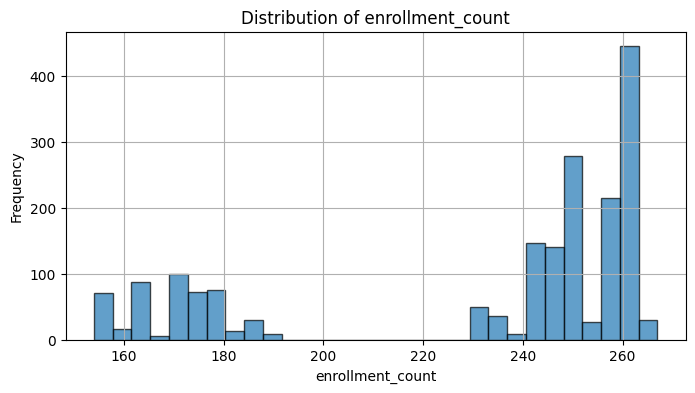

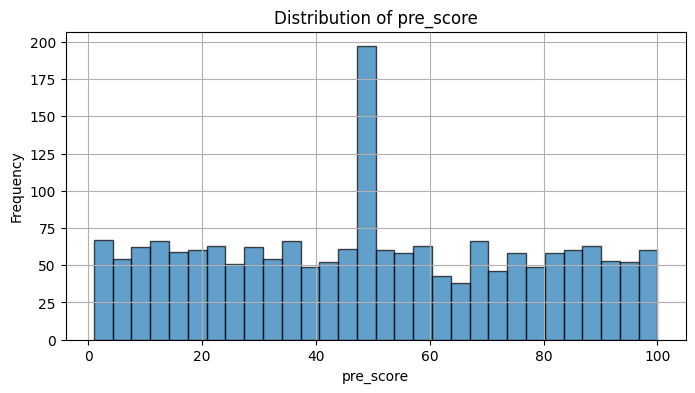

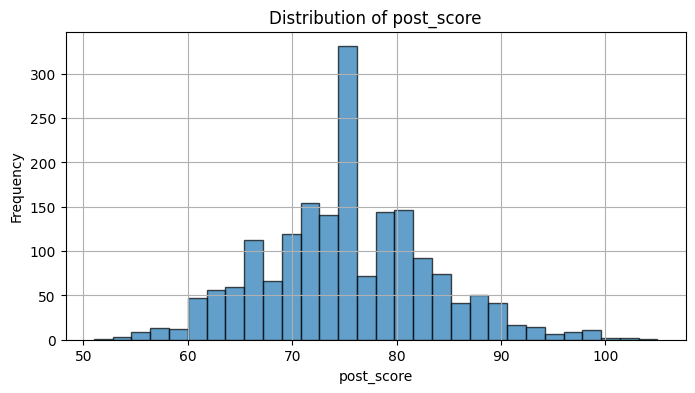

In [36]:
numerical_columns = ['enrollment_count', 'pre_score', 'post_score']

for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.hist(df[column], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

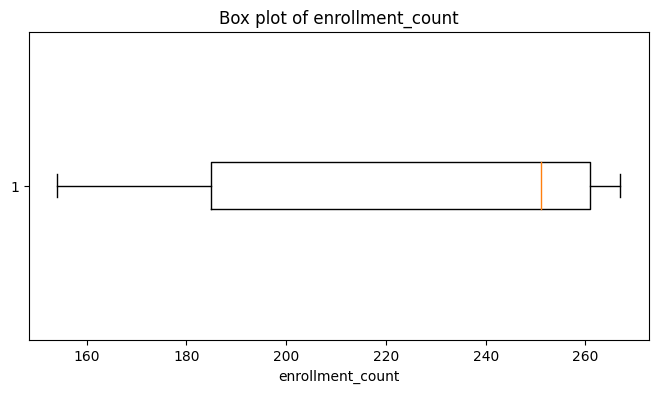

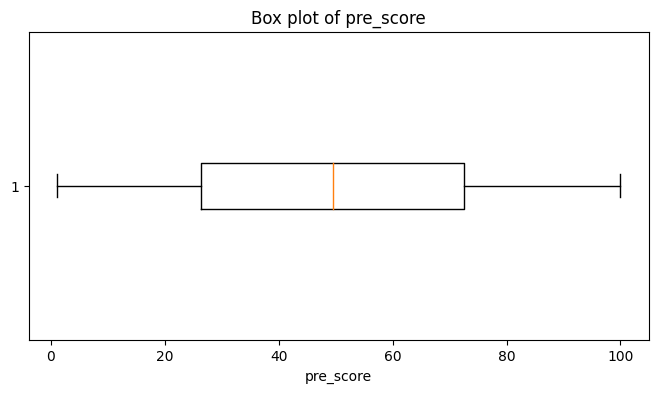

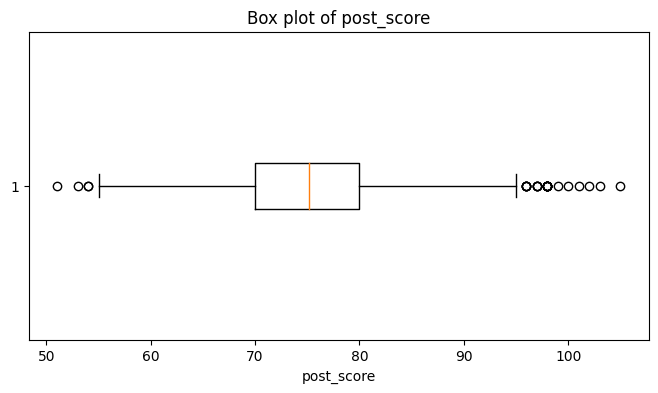

In [37]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    plt.boxplot(df[column], vert=False)
    plt.title(f'Box plot of {column}')
    plt.xlabel(column)
    plt.show()

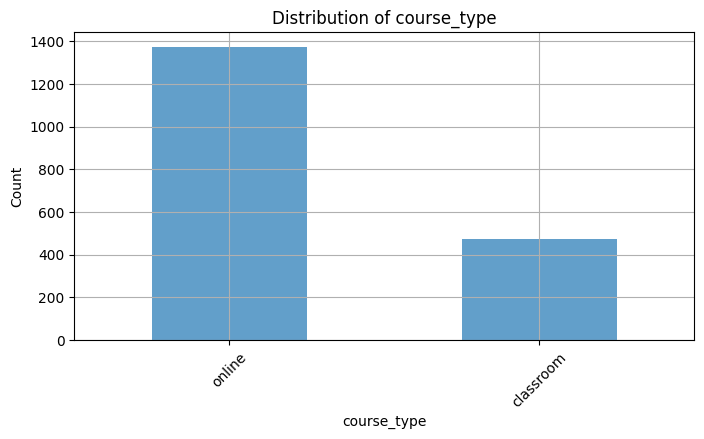

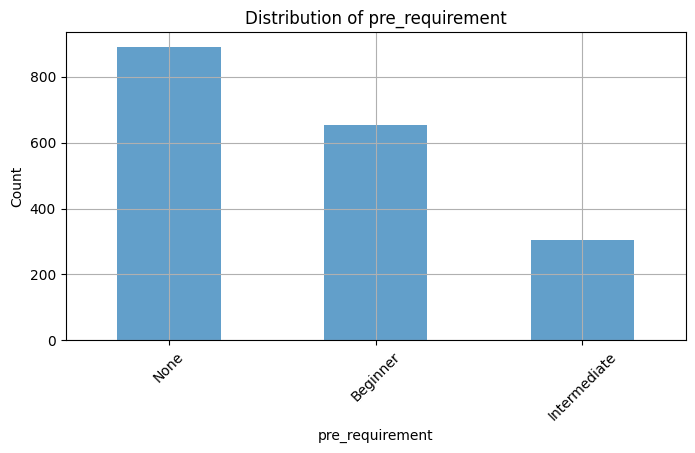

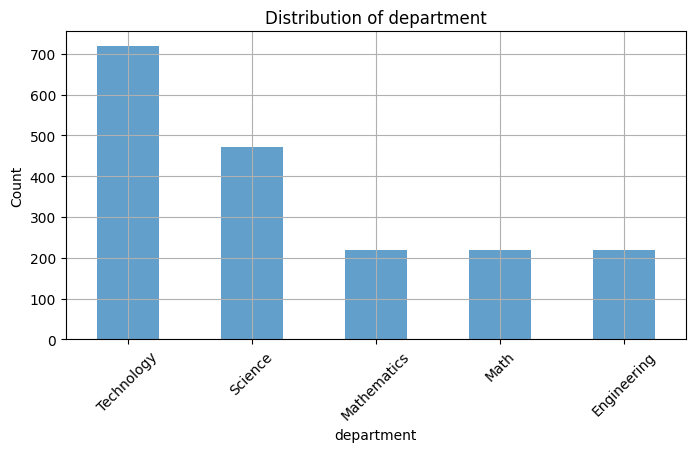

In [42]:
categorical_columns = ['course_type', 'pre_requirement', 'department']

# Bar charts for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 4))
    df[column].value_counts().plot(kind='bar', alpha=0.7)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

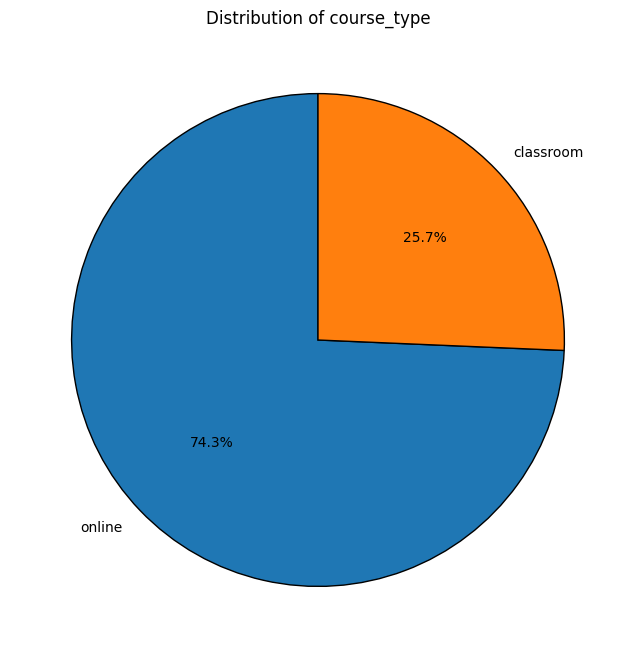

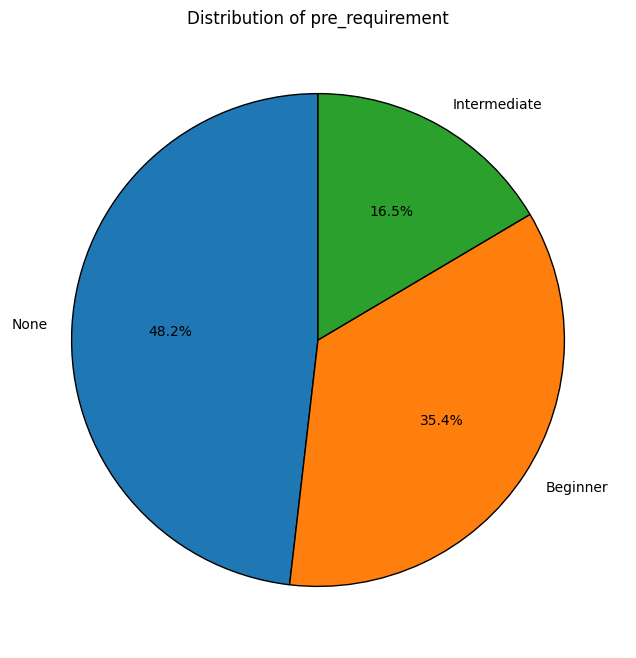

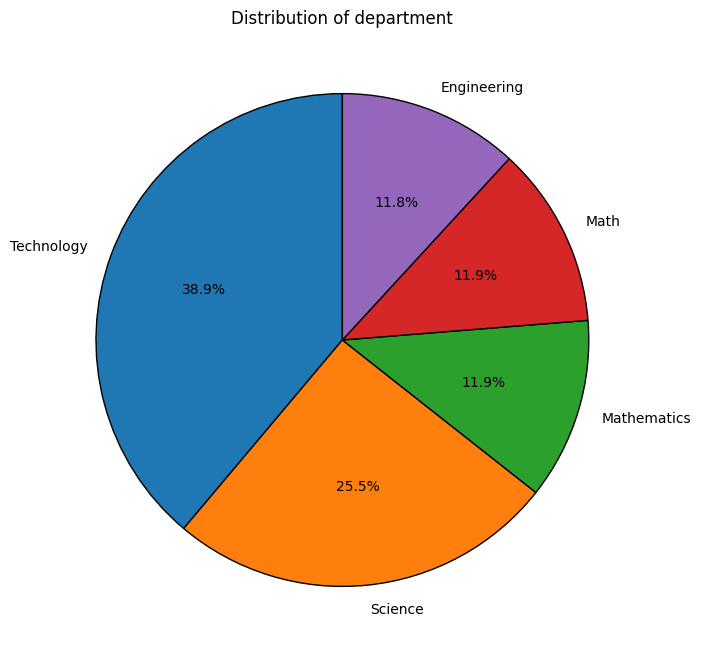

In [45]:
# Pie charts for categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 8))
    df[column].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops=dict(edgecolor='k'))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')
    plt.show()

## Statistical Analysis

In [46]:
df[['enrollment_count', 'pre_score', 'post_score']].corr()

,enrollment_count,pre_score,post_score
enrollment_count,1.000000,-0.009318,0.007179
pre_score,-0.009318,1.000000,0.535085
post_score,0.007179,0.535085,1.000000


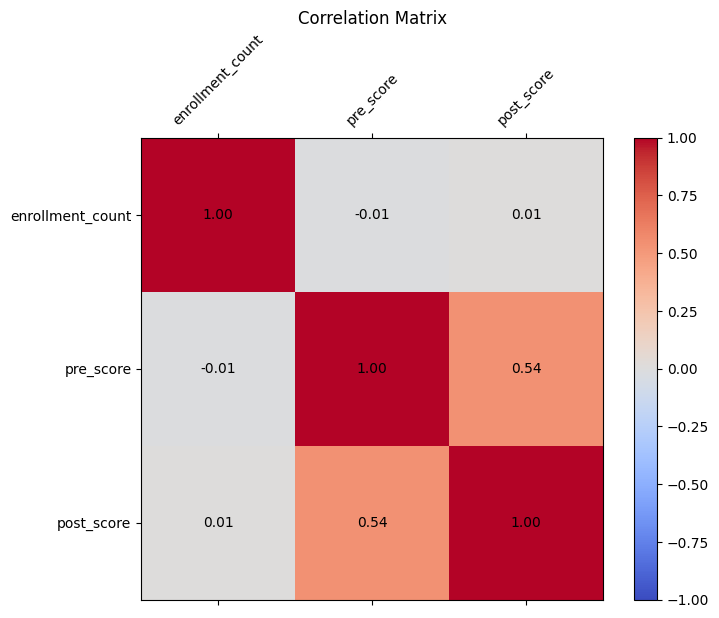

In [62]:
correlation_matrix = df[['enrollment_count', 'pre_score', 'post_score']].corr()

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(correlation_matrix, cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(0, len(correlation_matrix.columns), 1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)

ax.set_xticklabels(correlation_matrix.columns, rotation=45)
ax.set_yticklabels(correlation_matrix.columns)

for (i, j), val in np.ndenumerate(correlation_matrix):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='black')

plt.title('Correlation Matrix')
plt.show()

In [57]:
import scipy.stats as stats

# ANOVA for course_type
course_type_groups = [df[df['course_type'] == ct]['enrollment_count'] for ct in df['course_type'].unique()]
anova_course_type = stats.f_oneway(*course_type_groups)
print(f'ANOVA result for course_type: F-value = {anova_course_type.statistic}, p-value = {anova_course_type.pvalue}')

# ANOVA for department
department_groups = [df[df['department'] == dept]['enrollment_count'] for dept in df['department'].unique()]
anova_department = stats.f_oneway(*department_groups)
print(f'ANOVA result for department: F-value = {anova_department.statistic}, p-value = {anova_department.pvalue}')


ANOVA result for course_type: F-value = 31342.573048820876, p-value = 0.0
ANOVA result for department: F-value = 104.74531551638376, p-value = 1.7631630906572377e-80


Course Type: There is a highly significant difference in enrollment counts between online and classroom courses. This implies that the type of course (online vs. classroom) is a crucial factor influencing enrollment numbers.

Department: There is also a highly significant difference in enrollment counts across different departments. This means that the department in which a course is offered also significantly affects enrollment numbers.

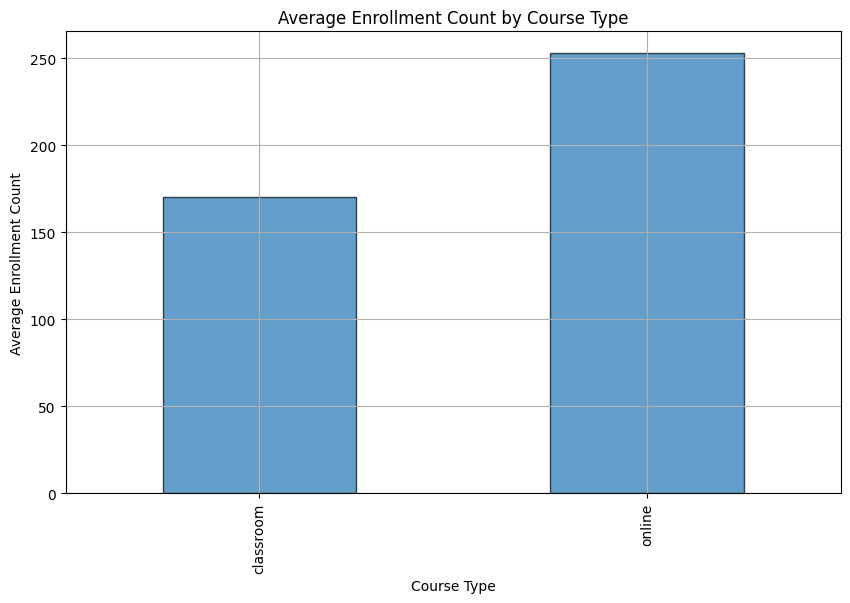

In [60]:
# Bar plot for course_type
plt.figure(figsize=(10, 6))
df.groupby('course_type')['enrollment_count'].mean().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Average Enrollment Count by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Average Enrollment Count')
plt.grid(True)
plt.show()

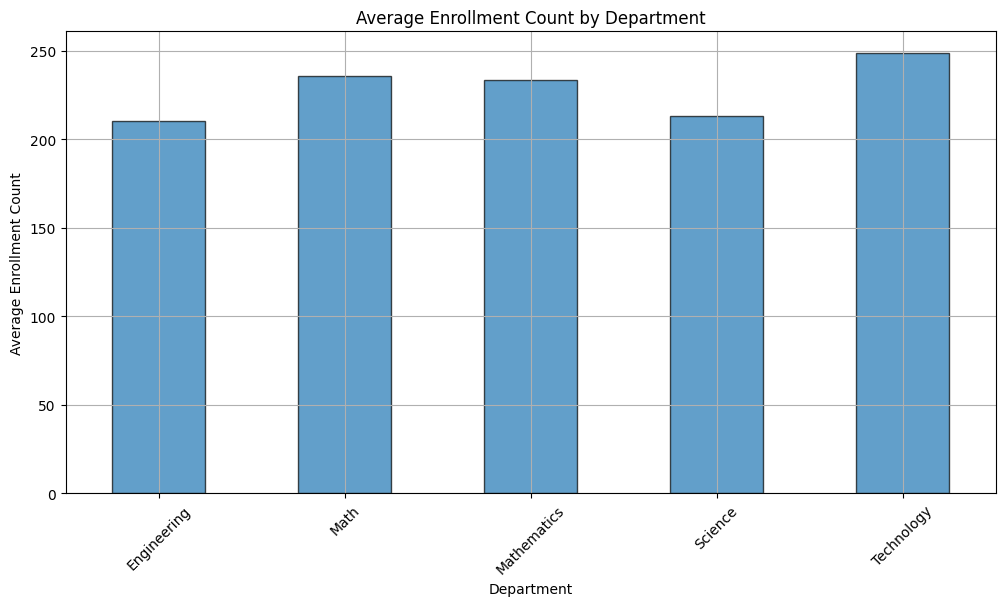

In [61]:
# Bar plot for department
plt.figure(figsize=(12, 6))
df.groupby('department')['enrollment_count'].mean().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Average Enrollment Count by Department')
plt.xlabel('Department')
plt.ylabel('Average Enrollment Count')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## Conclusion:
From this analysis, we conclude that the department and the course type greatly effects the enrollment count.
In course type there is higher Average Enrolment Count for the online type.